In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


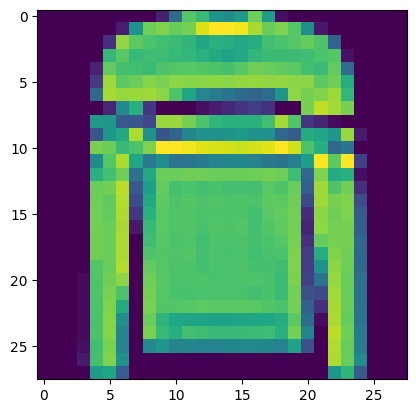

In [9]:
plt.imshow(x_train[5])

In [10]:
y_train[5]

2

In [11]:
#scale data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [12]:
#DNN model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=3024,activation="relu"),
    keras.layers.Dropout(.1),
    keras.layers.Dense(units=1064,activation="relu"),
    keras.layers.Dropout(.1),
    keras.layers.Dense(units=512,activation="relu"),
    keras.layers.Dropout(.1),
    keras.layers.Dense(units=255,activation="relu"),
    keras.layers.Dense(units=164,activation="relu"),
    keras.layers.Dense(units=10,activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 3024)              2373840   
                                                                 
 dropout (Dropout)           (None, 3024)              0         
                                                                 
 dense_1 (Dense)             (None, 1064)              3218600   
                                                                 
 dropout_1 (Dropout)         (None, 1064)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               545280    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

In [14]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
model.fit(x_train_scaled,y_train,epochs=12,validation_data=(x_test_scaled,y_test))

Epoch 1/12
1875/1875 [==============================] - 14s 5ms/step - loss: 0.5440 - accuracy: 0.8031 - val_loss: 0.4242 - val_accuracy: 0.8512
Epoch 2/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4078 - accuracy: 0.8547 - val_loss: 0.4088 - val_accuracy: 0.8600
Epoch 3/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3696 - accuracy: 0.8688 - val_loss: 0.4001 - val_accuracy: 0.8634
Epoch 4/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3479 - accuracy: 0.8750 - val_loss: 0.3712 - val_accuracy: 0.8693
Epoch 5/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3268 - accuracy: 0.8814 - val_loss: 0.3664 - val_accuracy: 0.8717
Epoch 6/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3129 - accuracy: 0.8862 - val_loss: 0.3735 - val_accuracy: 0.8720
Epoch 7/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3020 - accuracy: 0.8902 - val_loss: 0.3684 - val_accura

In [29]:
#convolution model
model_1=keras.Sequential([
  keras.layers.Conv2D(filters=618,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(28,28,1)),
  keras.layers.MaxPooling2D(padding="valid"),
  keras.layers.Conv2D(filters=512,kernel_size=(3,3),padding="valid",activation="relu"),
  keras.layers.MaxPooling2D(padding="valid"),
  keras.layers.Conv2D(filters=112,kernel_size=(3,3),padding="valid",activation="relu"),
  keras.layers.Flatten(),
  keras.layers.Dense(units=1024,activation="relu"),
  keras.layers.Dropout(.2),
  keras.layers.Dense(units=512,activation="relu"),
  keras.layers.Dense(units=10,activation="softmax")
  ])

In [30]:
model_1.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [31]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 618)       6180      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 618)       0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 512)       2848256   
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 512)         0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 112)         516208    
                                                                 
 flatten_6 (Flatten)         (None, 1008)             

In [32]:
model_1.fit(x_train_scaled,y_train,epochs=12,validation_data=(x_test_scaled,y_test))

Epoch 1/12
1875/1875 [==============================] - 40s 19ms/step - loss: 0.4457 - accuracy: 0.8353 - val_loss: 0.3331 - val_accuracy: 0.8761
Epoch 2/12
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2960 - accuracy: 0.8910 - val_loss: 0.3050 - val_accuracy: 0.8858
Epoch 3/12
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2539 - accuracy: 0.9053 - val_loss: 0.2899 - val_accuracy: 0.8946
Epoch 4/12
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2233 - accuracy: 0.9175 - val_loss: 0.2619 - val_accuracy: 0.9066
Epoch 5/12
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2030 - accuracy: 0.9239 - val_loss: 0.2725 - val_accuracy: 0.9045
Epoch 6/12
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1844 - accuracy: 0.9313 - val_loss: 0.2682 - val_accuracy: 0.9078
Epoch 7/12
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1635 - accuracy: 0.9387 - val_loss: 0.2702 -

In [ ]:
print("training report is as follow:")
print(classification_report(y_train,y_train_final))
print("testing repport is as follow")
print(classification_report(y_test,y_test_final))

training report is as follow:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5923
           1       0.97      0.98      0.97      6742
           2       0.94      0.93      0.93      5958
           3       0.94      0.89      0.91      6131
           4       0.94      0.95      0.94      5842
           5       0.87      0.92      0.90      5421
           6       0.97      0.96      0.96      5918
           7       0.95      0.95      0.95      6265
           8       0.91      0.91      0.91      5851
           9       0.92      0.92      0.92      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000

testing repport is as follow
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.97      0.98      0.97      1135
           2       

**Add hidden layers(2 layers of 320 and 160 neurons respectively)**

In [ ]:
model_1=keras.Sequential([
    keras.layers.Dense(units=320,activation="relu",input_shape=(784,)),
    keras.layers.Dense(units=160,activation="relu"),
    keras.layers.Dense(units=10,activation="softmax")
])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 320)               251200    
                                                                 
 dense_3 (Dense)             (None, 160)               51360     
                                                                 
 dense_4 (Dense)             (None, 10)                1610      
                                                                 
Total params: 304170 (1.16 MB)
Trainable params: 304170 (1.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_1.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
                )

In [ ]:
model_1.fit(x=x_train_flatten,y=y_train,validation_split=.8,epochs=10)

Epoch 1/10
375/375 [==============================] - 7s 17ms/step - loss: 0.3763 - accuracy: 0.8920 - val_loss: 0.2264 - val_accuracy: 0.9332
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1500 - accuracy: 0.9574 - val_loss: 0.1738 - val_accuracy: 0.9469
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0931 - accuracy: 0.9723 - val_loss: 0.1881 - val_accuracy: 0.9428
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0597 - accuracy: 0.9822 - val_loss: 0.1665 - val_accuracy: 0.9509
Epoch 5/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0364 - accuracy: 0.9894 - val_loss: 0.1540 - val_accuracy: 0.9570
Epoch 6/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0253 - accuracy: 0.9927 - val_loss: 0.1781 - val_accuracy: 0.9511
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0195 - accuracy: 0.9941 - val_loss: 0.1613 - val_accuracy: 0.9592